## Import libraries

In [22]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.plot import show

## Import your data

In [15]:
# Import you reference raster - you want this to define the extent and resolution of the raster you are going to create later
ref_ras = rasterio.open("ref_raster.tif")

# explore the profile of the raster file
ref_ras.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 90, 'height': 90, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.011108398433333331, 0.0, -1.049987793,
       0.0, -0.011112213133333328, 52.500097275), 'blockysize': 22, 'tiled': False, 'interleave': 'band'}

In [16]:
# import your point dataset
point_df = gpd.read_file("points_df.gpkg")

# preview your data
point_df.head()

,Species,Point_val,geometry
0,A,10,POINT (-0.81772 52.25854)
1,A,11,POINT (-0.81759 52.25819)
2,B,2,POINT (-0.81725 52.25817)
3,C,3,POINT (-0.81744 52.25841)
4,A,4,POINT (-0.81153 52.25519)


## Create a simple binary of where points are

In [17]:
%%time
### Rasterise your points layer

# Get list of geometries from points layer
geom = [geom for geom in point_df.geometry]

# Rasterize the layer (binary) and fill any non-point cells with 0
# out_shape defines the nubmer of rows and columns in your raster file, and transform defines the extent and resolution
binary_rast = features.rasterize(geom, out_shape=ref_ras.shape, transform=ref_ras.transform, fill=0)

CPU times: total: 0 ns
Wall time: 7.14 ms


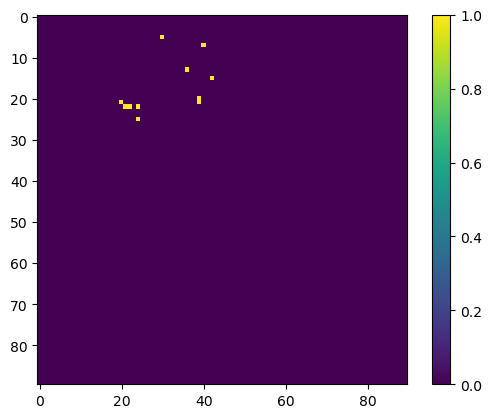

In [25]:
f, ax = plt.subplots(1)
plot_1 = show(binary_rast, ax=ax)
im = plot_1.get_images()[0]
f.colorbar(im, ax=ax);

## Calculate the count of points in each pixel

In [28]:
%%time
### Rasterise your points layer

# Get list of geometries from points layer
geom = [geom for geom in point_df.geometry]

# Rasterize the layer (binary) and fill any non-point cells with 0
# out_shape defines the nubmer of rows and columns in your raster file, and transform defines the extent and resolution
count_rast = features.rasterize(geom, out_shape=ref_ras.shape, transform=ref_ras.transform, fill=0, merge_alg=rasterio.enums.MergeAlg.add)

CPU times: total: 0 ns
Wall time: 5.05 ms


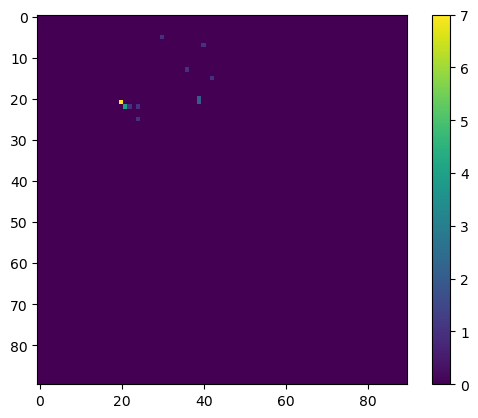

In [29]:
f, ax = plt.subplots(1)
plot_1 = show(count_rast, ax=ax)
im = plot_1.get_images()[0]
f.colorbar(im, ax=ax);

## Calculate the sum the value of all points in each pixel 

In [32]:
%%time
# Get list of geometries and population values from vector layer
geom = [geom for geom in point_df.geometry]
point_values = point_df['Point_val'].tolist()

# Create a generator of (geometry, value) pairs
shapes = ((geom, value) for geom, value in zip(geom, point_values))

# Rasterize the Pop layer and sum population values within each cell
Sum_Rast = features.rasterize(shapes=shapes, out_shape=ref_ras.shape, transform=ref_ras.transform, fill=0, merge_alg=rasterio.enums.MergeAlg.add)

CPU times: total: 0 ns
Wall time: 2 ms


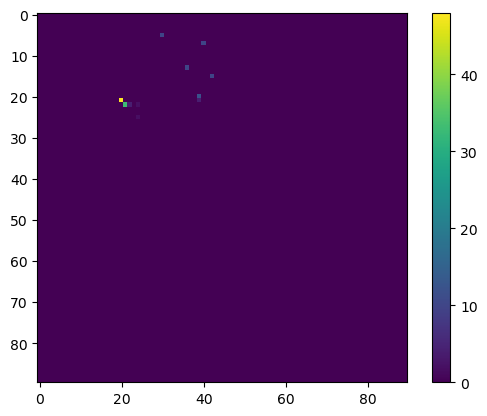

In [33]:
f, ax = plt.subplots(1)
plot_1 = show(Sum_Rast, ax=ax)
im = plot_1.get_images()[0]
f.colorbar(im, ax=ax);

## Save file


In [ ]:
# copy the profile of the reference raster
profile_copy = ref_ras.profile.copy()

# save file 
with rasterio.open("output_file_name.tif", 'w', **profile_copy) as dst:
     dst.write(the_variable_you_want_to_save, 1)